In [1]:
# 시각화 -> EDA -> 특성공학(변수 추가/선택...) -> 모델링 -> 평가
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # 디폴트 색상, 스타일 등 설정

In [398]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe(include = ['O']) # Objec 타입에 대한 기술통계를 구해라

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bostandyeff, Mr. Guentcho",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.shape
# 891(훈련) + 418(테스트) = 1309건 데이터
# 2/3(훈련) + 1/3(테스트)
#   70%          30%

(418, 11)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# features과 생존여부 사이에 어떤 관계가 있는지?

In [14]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

# 1. 퀴즈
# Survived : 300 (40.0%)
# Not Survived : 590 (60.0%)
# Total : 891

print("Survived : %d (%2.1f%%)" %(len(survived), (len(survived)/len(train))*100))
print("Survived : {} ({:.1f}%)".format(len(not_survived), (len(not_survived)/len(train))*100))
print("Total : {}".format(len(train)))

Survived : 342 (38.4%)
Survived : 549 (61.6%)
Total : 891


In [15]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
# 2.퀴즈
# 등실별 생존여부에 따른 인원수 출력
# train.groupby('Pclass')['Survived'].value_counts()
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
# train.groupby(['Pclass', 'Survived']).size()
# train.groupby(['Pclass', 'Survived']).apply(lambda x : len(x))

train.groupby('Pclass').Survived.value_counts()

train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


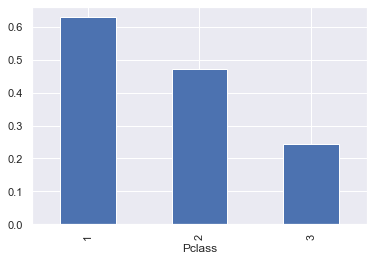

In [18]:
# train.groupby('Pclass').Survived.mean().plot() # 선그래프
train.groupby('Pclass').Survived.mean().plot(kind = 'bar')

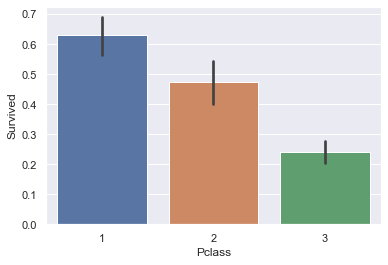

In [19]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

In [20]:
# 성별과 생존여부?
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [22]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


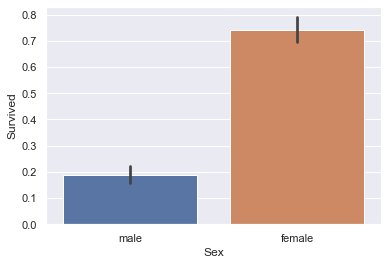

In [23]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

In [24]:
# Pclass & Sex 동시 고려 생존율과의 관계

# 크로스테이블(교차행렬)
pd.crosstab(train['Pclass'], train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


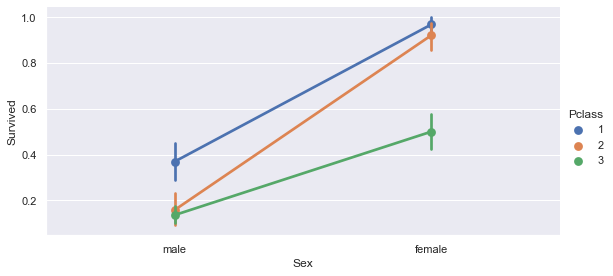

In [25]:
sns.factorplot('Sex', 'Survived', hue = 'Pclass', size = 4, aspect = 2, data = train)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


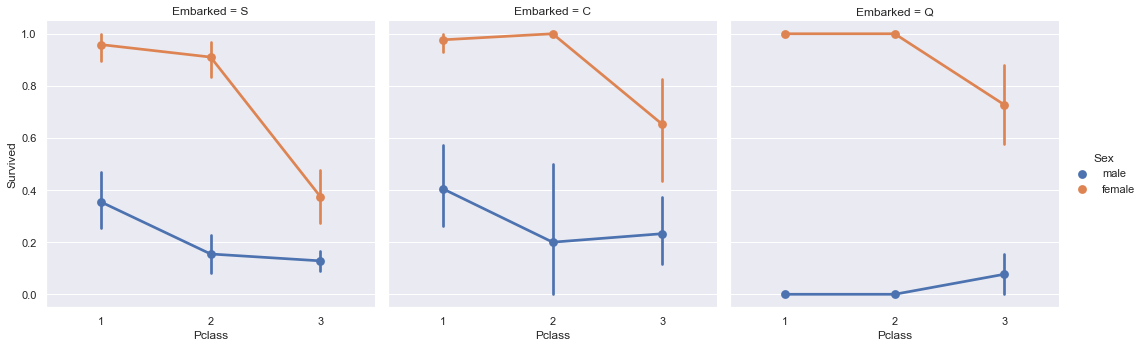

In [26]:
# sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train) # x=, y= 생략 가능

# 승선항 : 3개
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = train)

In [27]:
# 승선 항구에 따른 생존여부?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

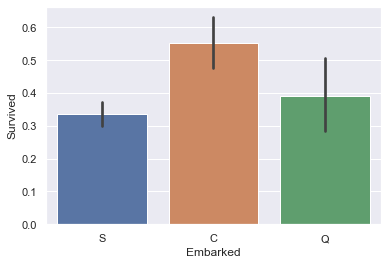

In [29]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)

In [30]:
# parch 와의 생존여부?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [31]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [32]:
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


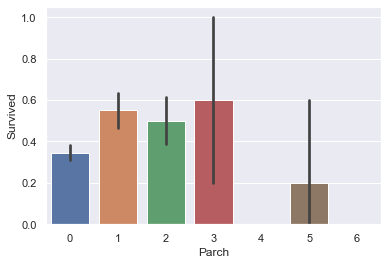

In [33]:
sns.barplot(x = 'Parch', y = 'Survived', data = train)
# error bar(오차 막대) : 신뢰구간

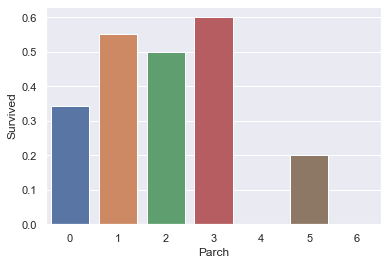

In [34]:
sns.barplot(x = 'Parch', y = 'Survived', data = train, ci = None)

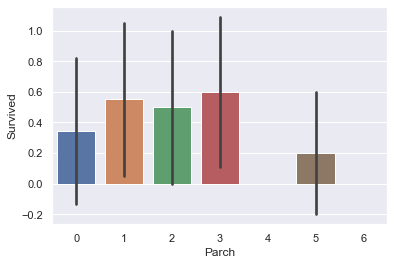

In [35]:
sns.barplot(x = 'Parch', y = 'Survived', data = train, ci = 'sd')

In [36]:
# SibSp와의 생존여부?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [37]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [38]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


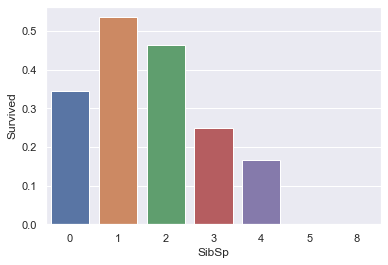

In [39]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train, ci = None)

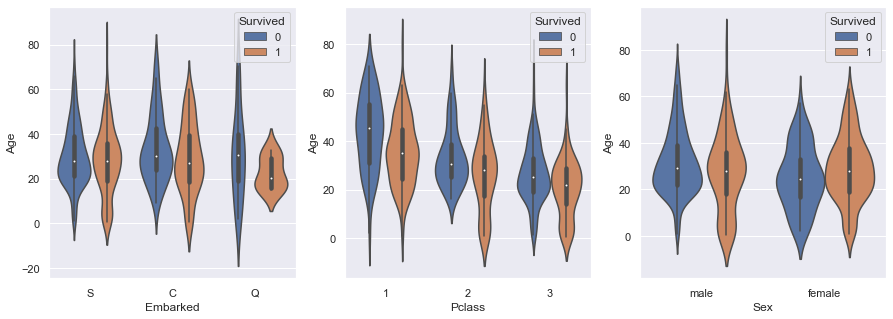

In [40]:
# 연령별(y), 항구/pclass/성별 (x) 생존여부(범례) -> 바이올린 plot

# 외형(틀)은 matplotlib.pyplot()
# 내부에 들어가는 그래프는 seaborn
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(131) # 1줄 3칸으로 나눈 다음 1번째 위치(칸)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
# 연령별(y), 항구/pclass/성벌 (x) 생존여부(범례)
sns.violinplot(x = 'Embarked', y = 'Age', hue = 'Survived', data = train, ax = ax1)
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, ax = ax2)
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = train, ax = ax3)

# 가운데 흰색점 : 중앙값(median)
# 중앙의 두꺼운 선 : 사분위 범위
# 중앙의 얇은 선 : 신뢰구간(95% 신뢰구간)

In [41]:
total_survived = train[train['Survived'] == 1]
total_not_survived = train[train['Survived'] == 0]
male_survived = train[(train['Survived'] == 1) & (train['Sex'] == 'male')]
female_survived = train[(train['Survived'] == 1) & (train['Sex'] == 'female')]
male_not_survived = train[(train['Survived'] == 0) & (train['Sex'] == 'male')]
female_not_survived = train[(train['Survived'] == 0) & (train['Sex'] == 'female')]

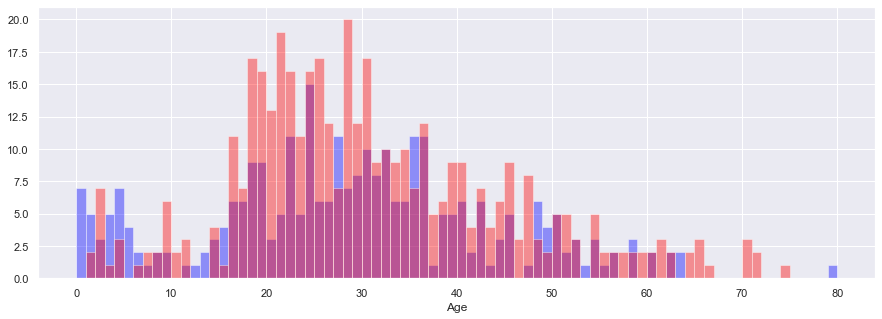

In [42]:
# displot : 히스토그램, 수치형 데이터의 빈도수를 시각화(나이에 따른 빈도수)
plt.figure(figsize = [15, 5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, kde = False, bins = range(0, 81, 1), color = 'blue')
sns.distplot(total_not_survived['Age'].dropna().values, kde = False, bins = range(0, 81, 1), color = 'red',
             axlabel = 'Age')
# kde = True 디폴트, kde : 밀집도그래프
# sns.set_style("bluegrid")

In [43]:
# total_survived['Age'].dropna().values

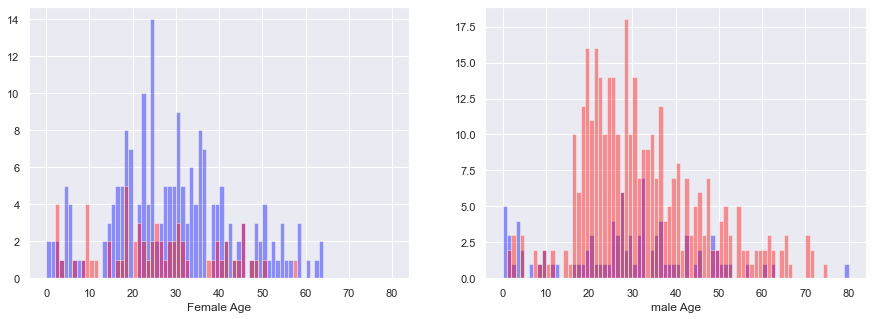

In [44]:
plt.figure(figsize = [15, 5])
plt.subplot(121) # 1줄 2칸, 1번째 칸에 출력
sns.distplot(female_survived['Age'].dropna().values, kde = False, bins = range(0, 81, 1), color = 'blue',
            axlabel = 'Female Age')
sns.distplot(female_not_survived['Age'].dropna().values, kde = False, bins = range(0, 81, 1), color = 'red',
            axlabel = 'Female Age')

plt.subplot(122) # 1줄 2칸, 2번째 칸에 출력
sns.distplot(male_survived['Age'].dropna().values, kde = False, bins = range(0, 81, 1), color = 'blue',
            axlabel = 'male Age')
sns.distplot(male_not_survived['Age'].dropna().values, kde = False, bins = range(0, 81, 1), color = 'red',
            axlabel = 'male Age')

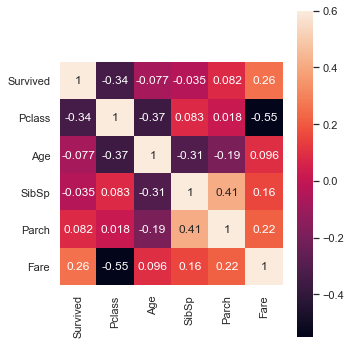

In [45]:
# 양/음의 상관관계
plt.figure(figsize = (5, 6))
sns.heatmap(train.drop('PassengerId', axis = 1).corr(), square = True, annot = True, vmax = 0.6)

In [46]:
# train.info()
# train.corr()
# train.drop('PassengerId', axis = 1)
train.drop('PassengerId', axis = 1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [399]:
# Feature Engineering & category <-> numerical
train # 891 rows X 12 columns
test # 418 rows X 11 columns
train_test_data = [train, test] # 리스트 내에 데이터프레임 2개가 요소로 저장

In [400]:
for dataset in train_test_data :
    dataset['Title'] = dataset.Name.str.extract(" ([A-Za-z]+)\.")
# 호칭의 특징 : 공백문자 + 알파벳 + 점(.)

In [401]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [402]:
# 3. 퀴즈

# 전체 호칭은 행 인덱스로, 성별은 열 인덱스
# Sex female male
# Title
# ---------------
# Capt   0     1
# ...
# Miss  182    0
# ...

pd.crosstab(train['Title'], train['Sex'])
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
train.groupby(['Title', 'Sex']).size().unstack().fillna(0)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [403]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Don           1
Jonkheer      1
Capt          1
Mme           1
Sir           1
Lady          1
Ms            1
Name: Title, dtype: int64

In [404]:
for dataset in train_test_data :
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Lady', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Don', 'Sir', 'Jonkheer', 'Capt', 'Major',
                                                 'Col', 'Rev', 'Dr'], 'Other')

In [405]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,127,0
Other,2,20


In [406]:
train[['Title', 'Survived']].groupby('Title').mean()
train[['Title', 'Survived']].groupby('Title', as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.795276
4,Other,0.318182


In [407]:
title_mapping = {"Mr" : 1,
                "Miss" : 2,
                "Mrs" : 3,
                "Master" : 4,
                "Other" : 5}

In [408]:
for dataset in train_test_data :
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [409]:
train.head()
train['Title'].value_counts()

1    517
2    185
3    127
4     40
5     22
Name: Title, dtype: int64

In [410]:
# female -> 1, male -> 0
for dataset in train_test_data :
    dataset['Sex'] = dataset['Sex'].map({'female' : 1, 'male' : 0})

In [411]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [412]:
train.Embarked.unique()
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [413]:
# nan은 모두 'S'로 설정
for dataset in train_test_data :
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [414]:
train.head()
# S : 0, C : 1, Q : 2로 변경
for dataset in train_test_data :
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [415]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


In [416]:
# train['Age'].isnull().sum()

# Age열에 대해 결측값 대체
# age평균 - age표준편차 <= 난수발생(Age 결측갑 대체) <= age평균 + age표준편차

for dataset in train_test_data :
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


# 1. 연습문제(더 좋은 방법을 고민...)
# 2. Cabin 결측값을 적절하게 대체 -> 모델링 -> 평가(score, before : 87%, after : ???)

# Age_mean = train.groupby('Title').Age.mean()
# Age_mean

# train.Age.fillna(0, inplace = True)
# test.Age.fillna(0, inplace = True)

# for dataset in train_test_data :
#     dataset.loc[(dataset['Title'] == 1) & (dataset['Age'] == 0), 'Age'] = Age_mean.loc[1]
#     dataset.loc[(dataset['Title'] == 2) & (dataset['Age'] == 0), 'Age'] = Age_mean.loc[2]
#     dataset.loc[(dataset['Title'] == 3) & (dataset['Age'] == 0), 'Age'] = Age_mean.loc[3]
#     dataset.loc[(dataset['Title'] == 4) & (dataset['Age'] == 0), 'Age'] = Age_mean.loc[4]
#     dataset.loc[(dataset['Title'] == 5) & (dataset['Age'] == 0), 'Age'] = Age_mean.loc[5]

<ipython-input-416-1cbe3f963cf6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [417]:
train['Age'].isnull().sum()
test['Age'].isnull().sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [418]:
# train['Age'].mean() # 29 - 14 ~ 29 + 14
# train['Age'].std()

In [419]:
train['Age'].mean()

29.52881032547699

In [420]:
train['Age'][np.isnan(train['Age'])]

Series([], Name: Age, dtype: float64)

In [421]:
# train['Age']
train['AgeBand'] = pd.cut(train['Age'], 5)

In [422]:
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index = False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.513043
1,"(16.336, 32.252]",0.348993
2,"(32.252, 48.168]",0.385542
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [423]:
for dataset in train_test_data :
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [424]:
train['Age']

0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
886    1.0
887    1.0
888    2.0
889    1.0
890    1.0
Name: Age, Length: 891, dtype: float64

In [425]:
for dataset in train_test_data :
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    dataset['Cabin'] = dataset['Cabin'].str.extract("([A-Z])")

In [426]:
for dataset in train_test_data :
    dataset['Cabin'] = dataset.Cabin.str.extract("([A-Z])")

In [427]:
train[['Cabin', 'Fare']].groupby('Cabin').mean()

,Fare
Cabin,
A,39.623887
B,113.505764
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250
T,35.500000


In [428]:
bins = [0, 14, 19, 36, 40, 47, 58, 101, 114]
train['FareBand'] = pd.cut(train['Fare'], bins)

In [429]:
for dataset in train_test_data :
    dataset.loc[dataset['Fare'] <= 14, 'Fare'] = 0 # G
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 19), 'Fare'] = 1 # F
    dataset.loc[(dataset['Fare'] > 19) & (dataset['Fare'] <= 36), 'Fare'] = 2 # T
    dataset.loc[(dataset['Fare'] > 36) & (dataset['Fare'] <= 40), 'Fare'] = 3 # A
    dataset.loc[(dataset['Fare'] > 40) & (dataset['Fare'] <= 47), 'Fare'] = 4 # E
    dataset.loc[(dataset['Fare'] > 47) & (dataset['Fare'] <= 58), 'Fare'] = 5 # D
    dataset.loc[(dataset['Fare'] > 58) & (dataset['Fare'] <= 101), 'Fare'] = 6 # C
    dataset.loc[dataset['Fare'] > 101, 'Fare'] = 7 # B
    dataset['Fare'] = dataset['Fare'].astype(int)

In [430]:
for dataset in train_test_data :
    dataset.loc[dataset['Fare'] == 0, 'Cabin'] = 'G'
    dataset.loc[dataset['Fare'] == 1, 'Cabin'] = 'F'
    dataset.loc[dataset['Fare'] == 2, 'Cabin'] = 'T'
    dataset.loc[dataset['Fare'] == 3, 'Cabin'] = 'A'
    dataset.loc[dataset['Fare'] == 4, 'Cabin'] = 'E'
    dataset.loc[dataset['Fare'] == 5, 'Cabin'] = 'D'
    dataset.loc[dataset['Fare'] == 6, 'Cabin'] = 'C'
    dataset.loc[dataset['Fare'] == 7, 'Cabin'] = 'B'

In [431]:
for dataset in train_test_data :
    dataset['Cabin'] = dataset['Cabin'].map({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6, 'T' : 7})

In [154]:
for dataset in train_test_data :
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
# train과 test의 'Fare'컬럼 값이 nan인 셀 값을 train의 'Fare' 컬럼값의 중앙값으로 설정

In [155]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby('FareBand', as_index = False).mean()
# pd.cut() : 동일 길이로 나누어서 범주로 만듬
# pd.qcut() : 동일 데이터 개수로 나누어서 범주로 만듬

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [156]:
train[['FareBand', 'Survived']].groupby('FareBand', as_index = False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [157]:
# 아래 구문을 2번 이상 실행하면 Fare열 값이 0~3 범위 내로 변경된 상태이므로,
# 모두 0으로 변경됨(주의!!!)
for dataset in train_test_data :
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    int32   
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int64   
 12  Title        891 non-null    int64   
 13  AgeBand      891 non-null    category
 14  FareBand     891 non-null    category
dtypes: category(2), float64(1), int32(1), int64(8), object(3)
memory usage: 89.3+ KB


In [432]:
for dataset in train_test_data :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [433]:
train[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [434]:
# 혼자 여행한 경우에 사망률이 높음을 알 수 있음/
for dataset in train_test_data :
    dataset['IsAlone'] = 0 # 혼자가 아님(디폴트)
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [435]:
train
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'AgeBand',
       'FareBand', 'FamilySize', 'IsAlone'],
      dtype='object')

In [436]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'FamilySize']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis = 1)

In [437]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1.0,0,6,0,1,0
1,1,1,1,2.0,6,2,1,3,0
2,1,3,1,1.0,0,6,0,2,1
3,1,1,1,2.0,5,3,0,3,0
4,0,3,0,2.0,0,6,0,1,1


In [438]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,892,3,0,2.0,0,6,2,1.0,1
1,893,3,1,2.0,0,6,0,3.0,0
2,894,2,0,3.0,0,6,2,1.0,1
3,895,3,0,1.0,0,6,0,1.0,1
4,896,3,1,1.0,0,6,0,3.0,0


In [439]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Title', 'IsAlone'],
      dtype='object')

In [440]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    int32  
 5   Cabin        418 non-null    int64  
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    float64
 8   IsAlone      418 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 27.9 KB


In [441]:
xTrain = train.drop('Survived', axis = 1)
yTrain = train['Survived']
xTest = test.drop('PassengerId', axis = 1).copy()
xTrain.shape, yTrain.shape, xTest.shape

((891, 8), (891,), (418, 8))

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [442]:
model = DecisionTreeClassifier()
model.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [443]:
round(model.score(xTrain, yTrain)*100, 2) # 87.65% 정확도

87.43

In [396]:
y_pred_dt = model.predict(xTest)
y_pred_dt

mysubmit = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Survived' : y_pred_dt
})

In [397]:
mysubmit.to_csv("mysubmit.csv", index = False)

In [ ]:
# 연습문제
# 2. Cabin 결측값을 적절하게 대체 -> 모델링 -> 평가(score, before : 87%, after : ???)

In [181]:
train['Cabin_sub'] = train.Cabin.str.extract("([A-Z])")
train['Cabin_sub'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_sub, dtype: int64

In [188]:
train[['Cabin_sub', 'Fare']].groupby('Cabin_sub').mean()

,Fare
Cabin_sub,
A,39.623887
B,113.505764
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250
T,35.500000


In [194]:
train[['Cabin_sub', 'Fare']].groupby('Cabin_sub').std()

,Fare
Cabin_sub,
A,17.975333
B,109.301500
C,70.225588
D,29.592832
E,32.608315
F,11.728217
G,3.601222
T,NaN


In [195]:
train[['Cabin_sub', 'Fare']].groupby('Cabin_sub').mean() - train[['Cabin_sub', 'Fare']].groupby('Cabin_sub').std()

,Fare
Cabin_sub,
A,21.648554
B,4.204264
C,29.925752
D,27.651744
E,13.418379
F,6.968575
G,9.980028
T,NaN


In [196]:
train[['Cabin_sub', 'Fare']].groupby('Cabin_sub').mean() + train[['Cabin_sub', 'Fare']].groupby('Cabin_sub').std()

,Fare
Cabin_sub,
A,57.599220
B,222.807264
C,170.376929
D,86.837407
E,78.635009
F,30.425010
G,17.182472
T,NaN


In [192]:
bins = [0, 14, 19, 36, 40, 47, 58, 101, 114]
pd.cut(train['Fare'], bins)

0        (0, 14]
1      (58, 101]
2        (0, 14]
3       (47, 58]
4        (0, 14]
         ...    
886      (0, 14]
887     (19, 36]
888     (19, 36]
889     (19, 36]
890      (0, 14]
Name: Fare, Length: 891, dtype: category
Categories (8, interval[int64]): [(0, 14] < (14, 19] < (19, 36] < (36, 40] < (40, 47] < (47, 58] < (58, 101] < (101, 114]]

In [197]:
train.loc[train['Fare'] <= 14, 'Fare'] = 0 # G
train.loc[(train['Fare'] > 14) & (train['Fare'] <= 19), 'Fare'] = 1 # F
train.loc[(train['Fare'] > 19) & (train['Fare'] <= 36), 'Fare'] = 2 # T
train.loc[(train['Fare'] > 36) & (train['Fare'] <= 40), 'Fare'] = 3 # A
train.loc[(train['Fare'] > 40) & (train['Fare'] <= 47), 'Fare'] = 4 # E
train.loc[(train['Fare'] > 47) & (train['Fare'] <= 58), 'Fare'] = 5 # D
train.loc[(train['Fare'] > 58) & (train['Fare'] <= 101), 'Fare'] = 6 # C
train.loc[train['Fare'] > 101, 'Fare'] = 7 # B

In [198]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_sub
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,6.0,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,5.0,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.0,NaN,S,NaN


In [200]:
train.loc[train['Fare'] == 0, 'Cabin_sub'] = 'G'
train.loc[train['Fare'] == 1, 'Cabin_sub'] = 'F'
train.loc[train['Fare'] == 2, 'Cabin_sub'] = 'T'
train.loc[train['Fare'] == 3, 'Cabin_sub'] = 'A'
train.loc[train['Fare'] == 4, 'Cabin_sub'] = 'E'
train.loc[train['Fare'] == 5, 'Cabin_sub'] = 'D'
train.loc[train['Fare'] == 6, 'Cabin_sub'] = 'C'
train.loc[train['Fare'] == 7, 'Cabin_sub'] = 'B'

In [201]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_sub
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,NaN,S,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,6.0,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,NaN,S,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,5.0,C123,S,D
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.0,NaN,S,G
